In [ ]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist, cifar10, cifar100

from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation

import numpy as np
import random

import matplotlib.pyplot as plt

In [ ]:
# This should print something along the lines of '2.0.0-rc1'
tf.__version__

'2.3.0'

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Cifar100
# labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
#                 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
#                 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
#                 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
#                 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
#                 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
#                 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
#                 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
#                 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
#                 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
#                 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
#                 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
#                 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
#                 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
#                 'worm']

# Cifar10
# labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# MNIST
labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

In [ ]:
# Pre-process data
img_rows, img_cols, channels = 28, 28, 1 # 32, 32, 3
num_classes = 10

x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape((-1, img_rows, img_cols, channels))
x_test = x_test.reshape((-1, img_rows, img_cols, channels))

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print("Data shapes", x_test.shape, y_test.shape, x_train.shape, y_train.shape)

Data shapes (10000, 28, 28, 1) (10000, 10) (60000, 28, 28, 1) (60000, 10)


In [ ]:
# Create model
def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), strides=(3, 3), padding='same', activation='relu', input_shape=(img_rows, img_cols, channels)))
    model.add(Conv2D(64, kernel_size=(3, 3), strides=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), strides=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(32))
    model.add(Dropout(0.2))
    model.add(Dense(32))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    
    return model

In [ ]:
# Create and fit model
model = create_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 10, 10, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 2, 2, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)               

In [ ]:
model.fit(x_train, y_train,
          batch_size=32,
          epochs=20,
          validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0192 - accuracy: 0.8683 - val_loss: 0.0061 - val_accuracy: 0.9598
Epoch 2/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0092 - accuracy: 0.9404 - val_loss: 0.0050 - val_accuracy: 0.9672
Epoch 3/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0072 - accuracy: 0.9542 - val_loss: 0.0042 - val_accuracy: 0.9727
Epoch 4/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0066 - accuracy: 0.9572 - val_loss: 0.0038 - val_accuracy: 0.9747
Epoch 5/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0058 - accuracy: 0.9626 - val_loss: 0.0037 - val_accuracy: 0.9756
Epoch 6/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0055 - accuracy: 0.9651 - val_loss: 0.0034 - val_accuracy: 0.9763
Epoch 7/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0051 - accuracy: 0.9673 - val_loss: 0.0034 - val_ac

In [ ]:
print("Base accuracy on regular images:", model.evaluate(x=x_test, y=y_test, verbose=0))

Base accuracy on regular images: [0.0027800381649285555, 0.9824000000953674]


In [ ]:
# Function to create adversarial pattern
def adversarial_pattern(image, label):
    image = tf.cast(image, tf.float32)
    
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        loss = tf.keras.losses.MSE(label, prediction)
    
    gradient = tape.gradient(loss, image)
    
    signed_grad = tf.sign(gradient)
    
    return signed_grad

actual: five
adversarial: three


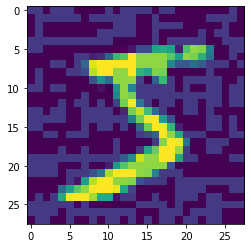

In [ ]:
# Create a signle adversarial example
image = x_train[0]
image_label = y_train[0]
perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), image_label).numpy()
adversarial = image + perturbations * 0.1

print('actual:', labels[model.predict(image.reshape((1, img_rows, img_cols, channels))).argmax()])
print('adversarial:', labels[model.predict(adversarial).argmax()])

if channels == 1:
    plt.imshow(adversarial.reshape((img_rows, img_cols)))
else:
    plt.imshow(adversarial.reshape((img_rows, img_cols, channels)))
plt.show()

In [ ]:
# Adversarial data generator
def generate_adversarials(batch_size):
    while True:
        x = []
        y = []
        for batch in range(batch_size):
            N = random.randint(0, 100)

            label = y_train[N]
            image = x_train[N]
            
            perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), label).numpy()
            
            
            epsilon = 0.1
            adversarial = image + perturbations * epsilon
            
            x.append(adversarial)
            y.append(y_train[N])
        
        
        x = np.asarray(x).reshape((batch_size, img_rows, img_cols, channels))
        y = np.asarray(y)
        
        yield x, y


Prediction: six Truth: six


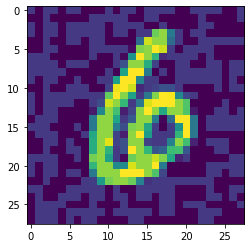

Prediction: seven Truth: one


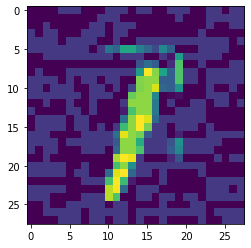

Prediction: seven Truth: four


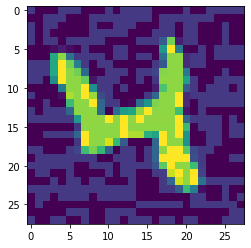

Prediction: zero Truth: zero


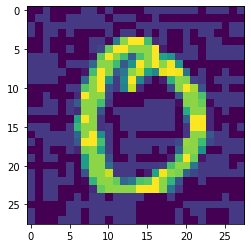

Prediction: six Truth: six


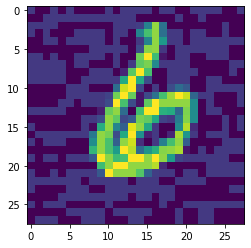

Prediction: eight Truth: eight


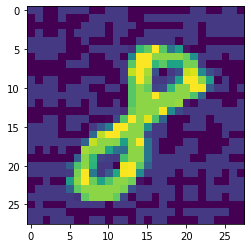

Prediction: six Truth: zero


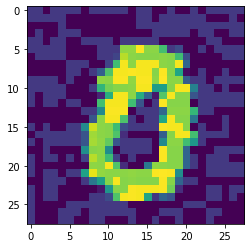

Prediction: two Truth: eight


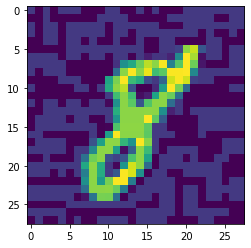

Prediction: three Truth: five


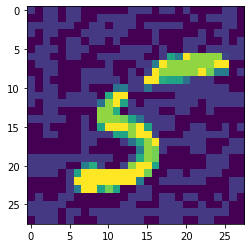

Prediction: four Truth: one


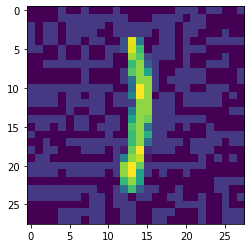

Prediction: nine Truth: nine


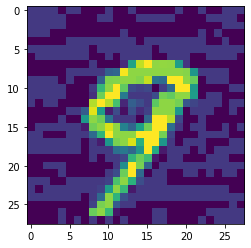

Prediction: two Truth: two


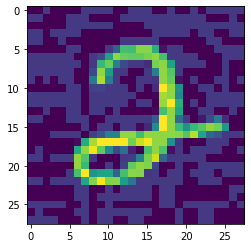

In [ ]:
# Generate and visualize 12 adversarial images
adversarials, correct_labels = next(generate_adversarials(12))
for adversarial, correct_label in zip(adversarials, correct_labels):
    print('Prediction:', labels[model.predict(adversarial.reshape((1, img_rows, img_cols, channels))).argmax()], 'Truth:', labels[correct_label.argmax()])
    if channels == 1:
        plt.imshow(adversarial.reshape(img_rows, img_cols))
    else:
        plt.imshow(adversarial)
    plt.show()

In [ ]:
# Generate adversarial data
# x_adversarial, y_adversarial = np.load("x_adv_10k.npy"), np.load("y_adv_10k.npy")
x_adversarial_train, y_adversarial_train = next(generate_adversarials(20000))
x_adversarial_test, y_adversarial_test = next(generate_adversarials(10000))

In [ ]:
# Assess base model on adversarial data
print("Base accuracy on adversarial images:", model.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

Base accuracy on adversarial images: [0.13227491080760956, 0.24060000479221344]


In [ ]:
# Learn from adversarial data
model.fit(x_adversarial_train, y_adversarial_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_test, y_test))

Epoch 1/10
625/625 [==============================] - 6s 9ms/step - loss: 0.0070 - accuracy: 0.9622 - val_loss: 0.0094 - val_accuracy: 0.9462
Epoch 2/10
625/625 [==============================] - 6s 10ms/step - loss: 0.0021 - accuracy: 0.9892 - val_loss: 0.0082 - val_accuracy: 0.9535
Epoch 3/10
625/625 [==============================] - 6s 10ms/step - loss: 0.0020 - accuracy: 0.9900 - val_loss: 0.0105 - val_accuracy: 0.9418
Epoch 4/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0020 - accuracy: 0.9897 - val_loss: 0.0091 - val_accuracy: 0.9491
Epoch 5/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0019 - accuracy: 0.9901 - val_loss: 0.0107 - val_accuracy: 0.9407
Epoch 6/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0012 - accuracy: 0.9937 - val_loss: 0.0105 - val_accuracy: 0.9415
Epoch 7/10
625/625 [==============================] - 6s 10ms/step - loss: 7.4573e-05 - accuracy: 0.9995 - val_loss: 0.0129 - val_accuracy: 0.9273

In [ ]:
# Assess defended model on adversarial data
print("Defended accuracy on adversarial images:", model.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

# Assess defended model on regular data
print("Defended accuracy on regular images:", model.evaluate(x=x_test, y=y_test, verbose=0))

Defended accuracy on adversarial images: [1.5624456262975018e-20, 1.0]
Defended accuracy on regular images: [0.012007023207843304, 0.932699978351593]


In [ ]:
x_adversarial_test, y_adversarial_test = next(generate_adversarials(10000))
print("Defended accuracy on adversarial images:", model.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

Defended accuracy on adversarial images: [0.005741025321185589, 0.9652000069618225]
